# Corner Plot

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = np.genfromtxt("data_line.txt", delimiter = ",",names = True)

In [8]:
data['y']

array([3.81236555, 3.44611839, 4.33797732, 4.06664317, 4.89311255,
       4.16881123, 4.00514655, 4.29908218, 4.20519812, 5.12091633,
       4.93058407, 4.61118199, 4.64684563, 4.12710372, 4.71587364,
       4.23475682, 4.23332896, 4.81243785, 5.99174412, 4.77980018,
       4.9086159 , 5.74956253, 6.04816359, 4.6243182 , 5.38977402,
       5.04700328, 6.03986635, 5.0806283 , 5.58395661, 5.88323551,
       6.63335596, 5.35078317, 5.48672026, 5.08942633, 6.29188886,
       5.80980658, 5.45495671, 6.26491911, 5.91270027, 6.06837511,
       6.65114486, 6.58271523, 5.34294755, 5.96732487, 5.43485061,
       6.21539465, 6.92488451, 5.79199041, 6.98764293, 6.83702977,
       5.80413616, 6.90586456, 6.12091196, 6.59234666, 7.36947652,
       7.08911076, 7.82344847, 6.53353482, 6.64799797, 7.2227007 ,
       7.28825465, 7.31484891, 7.37599847, 8.59455553, 7.20593134,
       7.78620549, 7.06913033, 7.04359073, 7.1837861 , 7.64596453,
       7.06794557, 8.13170145, 7.07405951, 7.41525514, 7.51884

In [9]:
m = np.random.uniform(1,5)
c = np.random.uniform(0,5)
sig = 1

In [10]:
y = lambda m,c: m*data['x'] + c

In [13]:
chi_sq = ((data['y'] - y(m,c))/sig)**2

In [51]:
LL  = lambda m,c: - len(y(m,c))/2 * np.log10(2*np.pi) - 1/(2*sig**2)*np.sum((data['y'] - y(m,c))**2)
LL(m,c)

-2684.8113666462887

In [94]:
params = np.zeros(shape=(100000,3))
for i in range(100000):
    m_temp = np.random.normal(m, 0.01)
    c_temp = np.random.normal(c, 0.01)
    u = np.random.uniform(0,1)
    if LL(m_temp, c_temp)>LL(m,c):
        m = m_temp
        c = c_temp
    elif LL(m_temp,c_temp) - LL(m,c)>np.log10(u):
        m = m_temp
        c = c_temp
    params[i,:] = np.asarray([m,c,LL(m,c)])
    
    

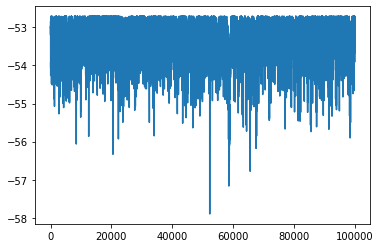

In [97]:
plt.plot(range(100000),params[:,2])

In [54]:
LL(m,c) - LL(m_temp,c_temp)

1337.3297104166188

In [99]:
import corner


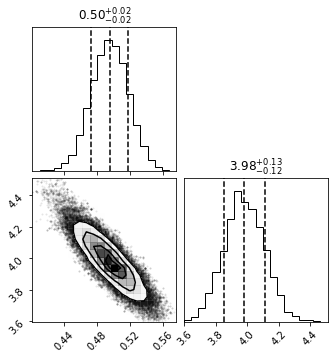

In [125]:
fig = corner.corner(params[:,:2],quantiles=[0.16,0.5,0.84], plot_datapoints = True,show_titles=True)

In [119]:
params[:,:2]

array([[0.48636667, 4.10506086],
       [0.48831233, 4.09805054],
       [0.48644547, 4.09093927],
       ...,
       [0.52235201, 3.89974651],
       [0.52722166, 3.91063655],
       [0.51674926, 3.91019751]])